# Premier League Football (EPL) : analysis on overall team performance (2000 until today) 

Over the past decades, the way of analyzing the performance of football players or clubs has shifted towards statistical analysis. This shift affects how fans are watch matches or criticise each player and clubs. The EPL is considered as one of the top football leagues in the world, and some clubs in the EPL are one of the top clubs in the world. According to the website of EPL, it is the most watched foorball league in the world. However, I do not know much about EPL and I am looking forward to interesting findings.

On this project, my focus in on the performance of each club. There are clubs that perform better than other clubs. But are there any significant differences between those clubs? In the history of the EPL, are there certain clubs that always perform better than other clubs? Analysis in this project is towards finding answers to those questions. 

Throughout this project, I collect some data set from the website (http://www.football-data.co.uk/englandm.php) using BeautifulSoup. The analysis within this project is carried by using the Pandas data frame. The outcome of the analysis will be present with data visualizations mainly using matplotlib library. More details about techniques are explained as the project goes.  

For this project, there is a limitation on the publicly available data about the EPL. Thus, it lacks the variety of the data set. Specifically, this project focuses on match data after 2000/2001 season. Details or more weaknesses and caveats in this project are explained as they arose within this project.

## Premier League match result data

I was originally looking for one data that contains all the result from 1993/1994 season to 2019/2020 season. However, I could only find individual CSV files for each season. In the beginning, I was going to download each CSV files manually, but it is much efficient to scrape the web site and download each file. Also, it allows the project to have the newest data sets from the web site every time (website seems updating their data quite often).

I scrape and download all data sets from the following web page http://www.football-data.co.uk/englandm.php. All data on this website are publicly available and are for everyone to use. This is a good resource for a project like this. Importantly, this data does not contain any sensitive pieces of information.

In [1]:
from bs4 import BeautifulSoup
import requests
import re 

headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}

In [2]:
# Webpage that I scrape CSV files from.
url = "http://www.football-data.co.uk/englandm.php"
all_files = [] #list for store file names

List of file names makes it easier to access those CSV files in later part of the project.

In [3]:
# download csv files from the web page 
with requests.Session() as req:
    try:
        r = req.get(url)
    except requests.exceptions.Timeout:
        print("Timeout error")
    except requests.exceptions.TooManyRedirects:
        print('URL is no longer good. Please use local files')
    except requests.exceptions.ConnectionError as e:
        print ("Error Connecting:",e)
        print('Please use local files')
    except requests.exceptions.RequestException as e:
        print('Please use local file', e)
        raise SystemExit(e)
    soup = BeautifulSoup(r.content, 'html.parser')
# all files' name that contain EPL data ends with E0.csv
    for link in soup.find_all(href=re.compile('E0.csv')):
        file = link.get('href')
        new_link = "http://www.football-data.co.uk/" + file
        try:
            r = req.get(new_link)
        except requests.exceptions.Timeout:
            print("Timeout error")
        except requests.exceptions.TooManyRedirects:
            print('URL is no longer good. Please use local files')
        except requests.exceptions.ConnectionError as e:
            print ("Error Connecting:",e)
            print('Please use local files')
        except requests.exceptions.RequestException as e:
            print('Please use local file', e)
            raise SystemExit(e)
        name = file.rsplit("/", 2)[-2]
        name = name + ".csv"
        all_files.append(name)
        with open(name, 'wb') as f:
            f.write(r.content)

With BeautifulSoup I scraped all href tag that includes 'E0.csv' string. In this website, E0 refers to EPL. This web site also contains data of other divisions thus it is necessary to specify the specific link name. Libraly 're' was useful for specifying the specific href link. With libraly 'request' I downloaded CSV files. If any errors are accur, please use files that are include within the project file. Data will no be the newest but it will work.

It is important that all CSV files have an appropriate names, and original name was not convinient enough for future use in the projec.

In [4]:
# original list 
print('Original list : ', all_files)
# reeverse the order of file names store in this list
all_files.reverse() 
print('New list : ', all_files)

Original list :  ['2021.csv', '1920.csv', '1819.csv', '1718.csv', '1617.csv', '1516.csv', '1415.csv', '1314.csv', '1213.csv', '1112.csv', '1011.csv', '0910.csv', '0809.csv', '0708.csv', '0607.csv', '0506.csv', '0405.csv', '0304.csv', '0203.csv', '0102.csv', '0001.csv', '9900.csv', '9899.csv', '9798.csv', '9697.csv', '9596.csv', '9495.csv', '9394.csv']
New list :  ['9394.csv', '9495.csv', '9596.csv', '9697.csv', '9798.csv', '9899.csv', '9900.csv', '0001.csv', '0102.csv', '0203.csv', '0304.csv', '0405.csv', '0506.csv', '0607.csv', '0708.csv', '0809.csv', '0910.csv', '1011.csv', '1112.csv', '1213.csv', '1314.csv', '1415.csv', '1516.csv', '1617.csv', '1718.csv', '1819.csv', '1920.csv', '2021.csv']


When approaching the data set about football matches, it is propriate to approch from older data to newer data. For that reason it was necessary to reverse the order of the list.

I notice that data after 2000/2001 season has more stats compare to seasons before 2000/2001 season. Data before 2000/2001 season contains only a match results where seasons after 2000/2001 contains more details stats of each match such as number of corner kicks, fouls committed, yellow cards etc.


In [5]:
file_group1 = []
file_group2 = []
for i in range(len(all_files)):
    if i < 7:
        file_group1.append(all_files[i])
    else:
        file_group2.append(all_files[i])

file_group3 = ["0708.csv", "0809.csv", "0910.csv", "1011.csv", "1112.csv", "1213.csv"]
file_group4 = ["1920.csv", '2021.csv']

for item in file_group3:
    file_group2.remove(item)

for item in file_group4:
    file_group2.remove(item)

I grouped files based on similarity of data that are contain in each files.  As I mnetioned, first group contains less data about each match than second group of files. In earlier version of this project, I had grouped files into two. However, it caused some errors in later on the project. As I investigate those errors, I notice that there are actually silght differences in certain CSV files. Based in what I found, I grouped files in group2 to three.

The following code will manipulate data by modify and combine csv files in order to carry out analysis. 

In [6]:
import os, glob
import pandas as pd
import numpy as np

In [7]:
# remove all files that are not going to be a part of the analysis
for file in file_group1:
    os.remove(file)
    all_files.remove(file)

Originally, my plan wsa to do analysis on data from 92/93 season. However, with very limited data there is not much analysis to do. Also, make analysis to be consistence with data set I decided to drop files that contain only very limited amount of data.

In [8]:
def modify_file(file, header):
    df = pd.read_csv(file, names=header, encoding='latin1')
#     data that each file contains after the modification
    df[['Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','HS','AS','HST',
        'AST','HF', 'AF','HC','AC','HY','AY','HR','AR']]
    df.to_csv(file, index=False, header=False)

This is a function to modify each data. Essentially, it convert CSV file into Pandas dataframe, modify it to appropriate form, then writ them back to the CSV file. I modify each file to have the same kind of data about each match. Each file contains the foolowing data. \
Div = League Division\
Date = Match Date (dd/mm/yy)\
Time = Time of match kick off\
HomeTeam = Home Team\
AwayTeam = Away Team\
FTHG = Full Time Home Team Goals\
FTAG = Full Time Away Team Goals\
FTR = Full Time Result (H=Home Win,D=Draw, A=Away Win)\
HTHG = Half Time Home Team Goals\
HTAG = Half Time Away Team Goals\
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)\
Attendance = Crowd Attendance\
Referee = Match Referee\
HS = Home Team Shots\
AS = Away Team Shots\
HST = Home Team Shots on Target\
AST = Away Team Shots on Target\
HC = Home Team Corners\
AC = Away Team Corners\
HF = Home Team Fouls Committed\
AF = Away Team Fouls Committed\
HY = Home Team Yellow Cards\
AY = Away Team Yellow Cards\
HR = Home Team Red Cards\
AR = Away Team Red Cards\

In [9]:
df = pd.read_csv("1415.csv")
header = list(df.columns.values)

for file in file_group2:
    modify_file(file, header)

df = pd.read_csv("1213.csv")
header = list(df.columns.values)

for file in file_group3:
    modify_file(file, header)

df = pd.read_csv("1920.csv")
header = list(df.columns.values)

for file in file_group4:
    modify_file(file, header)

I notice that files in group 1 contains unncessary blank rows at the end of each file, and function modify_file( ) remove those blank rows. Merging those files without modifying them will cause huge gaps within the merged file and it could cause some errorswhile data annalysis. \
For other files, I modify them by dropping unnecessary clounms. I modify bit differently depends on kind of data that they contain and to all files (except group 1) to have mostly the same set of data (note that some of them has some extras data). 

After all files are modified, they are combine to the one Pandas dataframe.

In [10]:
# Convert all csv files into Pandas data frame
df_group2 = (pd.read_csv(f) for f in file_group2)
df_group3 = (pd.read_csv(f) for f in file_group3)
df_group4 = (pd.read_csv(f) for f in file_group4)
# In each group combine csv files into one dataframe
df_group2_merged = pd.concat(df_group2, sort=False)
df_group3_merged = pd.concat(df_group3, sort=False)
df_group4_merged = pd.concat(df_group4, sort=False)
# Combine all data frame into the one data frame
df_group0021 = [df_group2_merged, df_group3_merged,df_group4_merged]
df_group0021_merged = pd.concat(df_group0021, sort=False)

In [11]:
 # dropping unnecessary rows
df_0021 = df_group0021_merged[df_group0021_merged.Div != 'Div']
 # dropping empty columns
df_0021 = df_0021[df_0021.HomeTeam.notnull()]

At the final step, I clean up the data frame by erasing unnecessary rows and empty columns. In earlier version of the project, I did not notice those rows and columns. However, as I work further in the project this approach to the data frame became necessary. 

The follwing code are not about modifying the data, but creating two lists that are useful later on the project. 

In [12]:
seasons = []
for i in all_files:
    season = i
    season = season[:-3]
    season = season[0:2] + "/" + season[2:4]
    seasons.append(season)

print(seasons)

['00/01', '01/02', '02/03', '03/04', '04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18', '18/19', '19/20', '20/21']


Create a list with items that indicate each of indivisual season.

In [13]:
# getting a list of team on EPL
# convert a column of the data frame into the list
def get_club(df):
    club = df["HomeTeam"].tolist()
    return(club)

# delete any repeated item on the list
EPL_club = list(set(get_club(df_0021)))
# sort the list in alphabetical order 
EPL_club = sorted(EPL_club)

print(EPL_club)

['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Blackpool', 'Bolton', 'Bournemouth', 'Bradford', 'Brighton', 'Burnley', 'Cardiff', 'Charlton', 'Chelsea', 'Coventry', 'Crystal Palace', 'Derby', 'Everton', 'Fulham', 'Huddersfield', 'Hull', 'Ipswich', 'Leeds', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', 'Portsmouth', 'QPR', 'Reading', 'Sheffield United', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan', 'Wolves']


Create a list of club which have play on the EPL after 2000/2001 season. This is for future use on the project.

 

## Total Number of Wins of Each Club


If you think about the history of football or even today there are always certain clubs that are perform better than other team. Is it the same for the EPL, as well?\
On this part of the project I focused on total number of wins that each club accumulated over about 20 seasons.
First, I create data frame "df_total_wins" to store data from this part of the analysis. This analysis is done by using the CSV files from each season. This analysis aim to answer the question "are there any certain teams perform better than other team all the time?".

In [14]:
# creating dataframe to store values from analysis
df_total_wins = pd.DataFrame(0,
                            index = EPL_club,
                            columns = seasons)


def season_wins(data, season):
    df = pd.read_csv(data)
    for row in df.itertuples():
        if(row.FTR == "H"):
            df_total_wins.loc[row.HomeTeam, season: ] = df_total_wins.loc[row.HomeTeam, season:] + 1
        elif(row.FTR == "A"):
            df_total_wins.loc[row.AwayTeam, season:] = df_total_wins.loc[row.AwayTeam, season:] + 1

This function is fot count the number of each clubs' wins in the single season. It counts the number of wins by iterate over the each match, and inclument the value on the data frame based on the result. The result can be determine on the column of original data. If home club won, increment the value of the home club by one and the same for away club. In a case of draw, there is no action by this funtion. 
On the data frame, each rows represent a club and each column represent a single season.  

In [15]:
for i in range(len(all_files)):
        season_wins(all_files[i], seasons[i])
df_total_wins = df_total_wins.sort_values(by=[seasons[-1]], ascending=False)

By go through every files by looping them, I collect all wins accumulated over the several seasons. On the dataframe, each column does not shows the total number of that season. Instead, it shows the total number of wins up to the end of that season. It is easy on the actual data frame, also this data frame is created for plotting purpose. Therefore, it is not best format for presentation.

In [24]:
import matplotlib.pyplot as plt
# cut all clubs with less thna 150 wins 
df_to_plot = df_total_wins[df_total_wins[seasons[-1]] > 150]
print(df_to_plot)
def plot_linegraph(i):
        list = df_to_plot.iloc[i].values.tolist()
        plt.plot(seasons, list)
        x = seasons[-1]
        y = list[-1]
        plt.annotate(df_to_plot.index[i], xy=(x, y))

I originally plotting all clubs into a line graph, however, it was too clouded. Also, my main focus is one top performance clubs, so I plot only clubs with over 150 wins on the line graph. \
This function is for label each line on the graph to make it clear that which line represent which club.

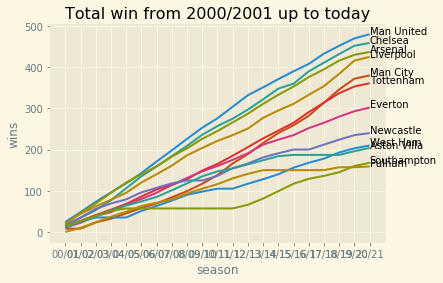

In [17]:
with plt.style.context('Solarize_Light2'):
    for i in range(len(df_to_plot.index)):
        plot_linegraph(i)
    plt.title('Total accumulated wins from 2000 to today')
    plt.xlabel('season')
    plt.ylabel('wins')

plt.show()

I plot the graph using matplotlib. Please refer to the 'line_graph.png' which is more bigger scale and clear to see.

From this analysis I dicover that there are 4 clubs that outperform other clubs: Man United, Chelse, Arsenal, and Liverpool. Next to those clubs, Man City and Tottenham perform quite better than other clubs. But it was not always been like that. In around 2000/2001, the most of team seems had a similar record. But around 2005/2006 those top 4 clubs started out perform other clubs. Based on the graph, probably it is safe to say that champion of each season are one of those top 4 clubs for the most of time. However, around 2014/2015 Man City and Totenham srtarted perform better than other clubs and shows rapid increase on the number of wins. It is possiblity that those 2 clubs reach the same level as 4 top clubs in new future. 


## Club performance analysis

On previopus section, I discovered that there are couple good clubs that perform very well over the years. Is stats capable to show what distinguish them from other clubs? 
On this part of the project, my focus is over all performance of each clubs over the several seasons. Although it is ideal to do various different stats. But there are only limited number of stats because of lack of the data and knowledge about football of myself. 

First, I crerated a list of categories that will be used for analysis of this part which will be useful when creating a data frame. 

In [ ]:
categories = ['Match', 'TotalW', 'HomeW', 'AwayW', 'Goals', 'ShotOnTarget', 'GoalsAllow', 'CornerKick','FoulsCommitted']
df_result_0021 = pd.DataFrame(0,
                            index = EPL_club,
                            columns = categories)

df_result_0021 is the data frame that is for analyze the data. For this section, I use a data frame that was created by combinung all of CSV filesat at the beggining of the project. Each row represent each club and columns represent different categories of the data.

In [18]:
 # pull out all data
for match in df_0021.itertuples():
    # get number of match each club played from 2000 to now
    df_result_0021.loc[match.HomeTeam, 'Match'] = df_result_0021.loc[match.HomeTeam, 'Match'] + 1
    df_result_0021.loc[match.AwayTeam, 'Match'] = df_result_0021.loc[match.AwayTeam, 'Match'] + 1

    # get total number of goals and goals allowed
    df_result_0021.loc[match.HomeTeam, 'Goals'] = df_result_0021.loc[match.HomeTeam, 'Goals'] + match.FTHG
    df_result_0021.loc[match.AwayTeam, 'GoalsAllow'] = df_result_0021.loc[match.AwayTeam, 'GoalsAllow'] + match.FTHG
    df_result_0021.loc[match.AwayTeam, 'Goals'] = df_result_0021.loc[match.AwayTeam, 'Goals'] + match.FTAG
    df_result_0021.loc[match.HomeTeam, 'GoalsAllow'] = df_result_0021.loc[match.HomeTeam, 'GoalsAllow'] + match.FTAG

    # get total number of shot on target
    df_result_0021.loc[match.HomeTeam, 'ShotOnTarget'] = df_result_0021.loc[match.HomeTeam, 'ShotOnTarget'] + match.HST
    df_result_0021.loc[match.AwayTeam, 'ShotOnTarget'] = df_result_0021.loc[match.AwayTeam, 'ShotOnTarget'] + match.AST

    # get total number of corners
    df_result_0021.loc[match.HomeTeam, 'CornerKick'] = df_result_0021.loc[match.HomeTeam, 'CornerKick'] + match.HC
    df_result_0021.loc[match.AwayTeam, 'CornerKick'] = df_result_0021.loc[match.AwayTeam, 'CornerKick'] + match.AC

    # total number of fouls committed
    df_result_0021.loc[match.HomeTeam, 'FoulsCommitted'] = df_result_0021.loc[match.HomeTeam, 'FoulsCommitted'] + match.HF
    df_result_0021.loc[match.AwayTeam, 'FoulsCommitted'] = df_result_0021.loc[match.AwayTeam, 'FoulsCommitted'] + match.AF

    #total number of home win and away win
    if match.FTR == 'H':
        df_result_0021.loc[match.HomeTeam, 'HomeW'] = df_result_0021.loc[match.HomeTeam, 'HomeW'] + 1
    elif match.FTR == 'A':
        df_result_0021.loc[match.AwayTeam, 'AwayW'] = df_result_0021.loc[match.AwayTeam, 'AwayW'] + 1

# total numver of win
for club in EPL_club:
    df_result_0021.loc[club, 'TotalW'] = df_result_0021.loc[club, 'HomeW'] + df_result_0021.loc[club, 'AwayW']



To collect all the data for analysis, I use the same approach as before. Iterate over the match and collect data rthat matches the categories of the new data frame. As I mention in previous section, each column of this dataframe does not represent data of each season, data that is accumulated until the ebnd of each season. 

In [19]:
analysis_topics = ['Goal Percentage', 'Goal per Match', 'Goal Allow per Match', 'Fouls Committed per Match', 
            'Home Win ratio', 'Away Win ratio', 'Total Wins']

df_analysis = pd.DataFrame(0,
                          index=EPL_club,
                          columns=analysis_topics)

A list 'analuysis_topics' is a collection of different topics of analysis for this part. A also create new data frame to store result of analysis and to visualize the fiubdings. As same as previous data frame, each row represent each club and each column represent different topics.

In [20]:
for club in df_result_0021.itertuples():
    # goal percentage
     df_analysis.loc[club.Index, "Goal Percentage"] = club.Goals / club.ShotOnTarget
     # goal per game
     df_analysis.loc[club.Index, "Goal per Match"] = club.Goals / club.Match
     # goal allow per match
     df_analysis.loc[club.Index, "Goal Allow per Match"] = club.GoalsAllow / club.Match
     # Fouls comited per match
     df_analysis.loc[club.Index, "Fouls Committed per Match"] = club.FoulsCommitted / club.Match
     # Win rtaio Home
     df_analysis.loc[club.Index, "Home Win ratio"] = club.HomeW / club.TotalW
     # win ratio Away
     df_analysis.loc[club.Index, "Away Win ratio"] = club.AwayW / club.TotalW
     # Total wins (not part of analysis)
     df_analysis.loc[club.Index, "Total Wins"] = club.TotalW
     # total match played (not part of analysis)
     df_analysis.loc[club.Index, "Match Played"] = club.Match 

df_analysis = df_analysis.sort_values(by = ['Total Wins'], ascending=False)

This section of code perform different analysis. First analysis shows percentage of goals out of number of shot on target. I was curious to find out how much out of those shot on tasrget are acvtually lead to goals. Perhaps better clubs has higher number. Next three analysis are average of goals, goals allow, and fouls commited per game.Last two analysis aim to find what are the ration between wins on home and away. It can shows if clubs perform better at home match overall.

After all of analysis are performed, I visualized them on the table with different colors and bar graphs within each cell. I use Pandas for this visualization by styling the dataframe. Originally in earlier version of the project, I created functions to rounding floot numbers and convert decimals numbers to percentage. However in later version, I dicover that Pandas has better solution to that. On the process of creating the table it format each values in certain way to round values or convert them into percentage value. It is much efficient than previous approach in terms of run time and cleaner code.

In [21]:
import seaborn as sns

df_analysis = df_analysis.sort_values(by = ['Total Wins'], ascending=False)
cm_tomato = sns.light_palette("tomato", as_cmap=True)
cm_blue = sns.light_palette("blue", as_cmap=True)

# formating each values and add extra style to visualize each findings. 
df_analysis.style.format({'Home Win ratio':'{:.2%}'})\
                        .format({'Away Win ratio':'{:.2%}'})\
                        .format({'Goal Percentage':'{:.2%}'})\
                        .format({'Goal per Match':'{:.2f}'})\
                        .format({'Goal Allow per Match':'{:.2f}'})\
                        .format({'Fouls Committed per Match':'{:.2f}'})\
                        .background_gradient(cmap=cm_tomato, subset = ['Home Win ratio', 'Away Win ratio'])\
                        .background_gradient(cmap=cm_blue, subset = ['Goal per Match', 'Goal Allow per Match'])\
                        .bar(subset=['Total Wins'], align='mid', color= 'green')\
                        .bar(subset=['Match Played'], align='mid', color= 'pink')\
                        .bar(subset=['Goal Percentage'], align='mid', color= 'orange')\
                        .bar(subset=['Fouls Committed per Match'], align='mid', color= 'yellow')


,Goal Percentage,Goal per Match,Goal Allow per Match,Fouls Committed per Match,Home Win ratio,Away Win ratio,Total Wins,Match Played
Man United,26.38%,1.89,0.91,11.25,57.08%,42.92%,480,776
Chelsea,26.67%,1.85,0.91,11.12,56.64%,43.36%,459,777
Arsenal,27.13%,1.89,1.04,11.03,60.18%,39.82%,437,777
Liverpool,25.56%,1.79,0.98,10.71,58.59%,41.41%,425,777
Man City,27.26%,1.79,1.09,11.31,60.00%,40.00%,380,737
Tottenham,24.17%,1.57,1.21,11.25,62.60%,37.40%,361,776
Everton,24.03%,1.34,1.24,12.16,64.90%,35.10%,302,776
Newcastle,23.12%,1.24,1.43,11.84,66.25%,33.75%,240,700
West Ham,24.33%,1.22,1.48,11.52,63.81%,36.19%,210,663
Aston Villa,23.20%,1.19,1.40,12.50,59.80%,40.20%,204,661


From tabkle there are several different findings. 

1) Goal percentage is represented by the bar graph so differences are clear. Top clubs have somewhat higher numbers but not necessary the best. Some other clubs have quite high number but overall performance are not so well. Somewhere above the average is necessary but this is not something that distinguish between better clubs from others.

2) Goals and goals aloow per match are visualize with gradation of the color. Darker cokor represent a higher number. This topics shows clear difference. Better performing clubs have darker colors on goals per match, where poorly performing clubs have darker color on goals allow per match. It is obvious that this topic comes out this way if you think  about a nature of football. 

3) Fouls per match seems nothing to do with overall performance. It is visualize by the bar graph and the most of clubs have similar values. 

4) Last topics: home/away win ration. Every clubs have higher winning ration on home matches.From this data you can define that home matches have higher chance of win. Even it is true for better performing clubs, they have closer to even ration than other clubs. On this visualizartion, darker color on away win and nutural color on home win shows the better performance of clubs.

Last two sections of the table is not part of the analysis but visualized with the bar so it shows diffrences on those number between clubs.

Throughout this project, I carfully checked each libralies version and make sure to use newest. Also, when I look for the resorce for some techniques I try to use newer technique. But there are some techniques that has not developed much over the past years. 

## Conclusion

Overall on this project, there are some interesting findings from the analysis.

I was expecting less teams are outperforming oters, but data shows there are about 6 of them : Man United, Cheklse, Arsenal, Liverpool, Man City, and Totenham. Surprisingly, they are all based on big city in England. Data also show that those teams are most likely to be best clubs in the EPL for long time. It is safe to say that champion will be from one of those 6 clubs for next decade.

On other analysis, it show what criteria distinguish the performance of clubs. Goal percentage and fouls commited per game are not so different between clubs. However, goals/goals allow per match and ration of home/away win show siginificant differences and distinguish clubs' performances. The beteer temas have grater number of goals per match than allow and similar number of wins between home and away matches.

Overall, this project show that to perform well in the EPL, clubs' need to have more goals per match and similar performance on both of home and away match. 

## Further Work

The further work for this project would be to use bigger data pf the EPL to find more about differences between clubs' performances. Also, to use other league from the world. 

There are several differernt football leagues across the world and analysing their stat using the same techniques as this project is possible. Also, combinig those analysis on different league can build somewhat big size project. I would be pareticulaly interested to see if every leagues have similar trend as the EPL. Another possible league is Europa Champions League. It is the highest competion of football in the world and only clubs with high performace can play. Analysis on that league would bring lots of interesting findings.

The most interesting extention of this project would be the using data from other sports. Different sports have different stats but the same techniques still can apply. Comparingbetween football and other sports can be intersting project to find about nature of different sports. 





For this project, I created private GitHub repository for the version control purpose. So, I can keep track and review all changes that I made over the period of time.  The following code shows the log of my reporsitory. 

In [22]:
!git log --oneline --decorate --reverse 

b068c8d Initial commit
dd564ae My project
2afdb84 README.md
828e592 draft of part 1
5a9d59c ver 1.1
efd1409 ver 1.2
7a9c02a ver 1.3
2e0d1f1 ver 1.4 (Part 1 complete
add8434 (HEAD -> main, origin/main, origin/HEAD) ver 1.5 (part2 code complete)


## References and Resources

Refrence to write some contex.

Premierleague.com. 2021. Premier League Competition Format & History | Premier League. [online] Available at: <https://www.premierleague.com/premier-league-explained> [Accessed 11 January 2021].

Data resoruce.

England Football Results Betting Odds | Premiership Results & Betting Odds. (2021, January 5). Football-Data.Co.Uk. http://www.football-data.co.uk/englandm.php


I refrences to some online resources to get idea of how to use libraly and other techniques. 

Correct way to try/except using Python requests module? (2013, May 12). Stack Overflow. https://stackoverflow.com/questions/16511337/correct-way-to-try-except-using-python-requests-module

Downloading Multiple csv Files from a Webpage using BeautifulSoup. (2020, May 26). Stack Overflow. https://stackoverflow.com/questions/62019059/downloading-multiple-csv-files-from-a-webpage-using-beautifulsoup

Rathi, A. (2020, August 4). How to use Git / GitHub with Jupyter Notebook - Towards Data Science. Medium. https://towardsdatascience.com/how-to-use-git-github-with-jupyter-notebook-7144d6577b44

Libaraly Documentations 

Beautiful Soup Documentation — Beautiful Soup 4.9.0 documentation. (2020). BeautifulSoup. https://www.crummy.com/software/BeautifulSoup/bs4/doc/#

Pandas 1.2.0 documentation. (2020). Pandas. https://pandas.pydata.org/docs/reference/index.html

Matplotlib 3.3.3 documentation. (2020). Matplotlib. https://matplotlib.org/3.3.3/contents.html

